Based on following:

https://www.tensorflow.org/tutorials/load_data/images


https://www.tensorflow.org/tutorials/keras/basic_classification





In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

tf.enable_eager_execution()
print(tf.__version__)

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

# TensorFlow and tf.keras

from tensorflow import keras

from google.colab import drive



# This will prompt for authorization.
drive.mount('/content/drive')

1.14.0
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# Load Data


In [0]:
# DEFINE CONSTANTS
data_root_path = "/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/"
project_id = "holzerkennung"
model_id = "ICN8825180478536945284"
service_account_file = '/content/drive/My Drive/Colab Notebooks/holzerkennung.json'

In [3]:
# IMPORT FILES AND LABELS
import pathlib
data_root = pathlib.Path(data_root_path)
print(data_root)

/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray


In [4]:
for item in data_root.iterdir():
  print(item)

/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links
/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/rechts


In [0]:
import random
all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]

In [6]:
all_image_paths[:10]

['/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links/20190925-175321-094871.jpg',
 '/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links/20190925-175327-421709.jpg',
 '/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links/20190925-175357-369537.jpg',
 '/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links/20190925-175355-807282.jpg',
 '/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links/20190925-175350-219056.jpg',
 '/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links/20190925-175337-687421.jpg',
 '/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links/20190925-175358-936263.jpg',
 '/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links/20190925-175340-788962.jpg',
 '/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links/20190925-175339-215701.jpg',
 '/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links


# Inspect the images. Now let's have a quick look at a couple of the images, so you know what you're dealing with:

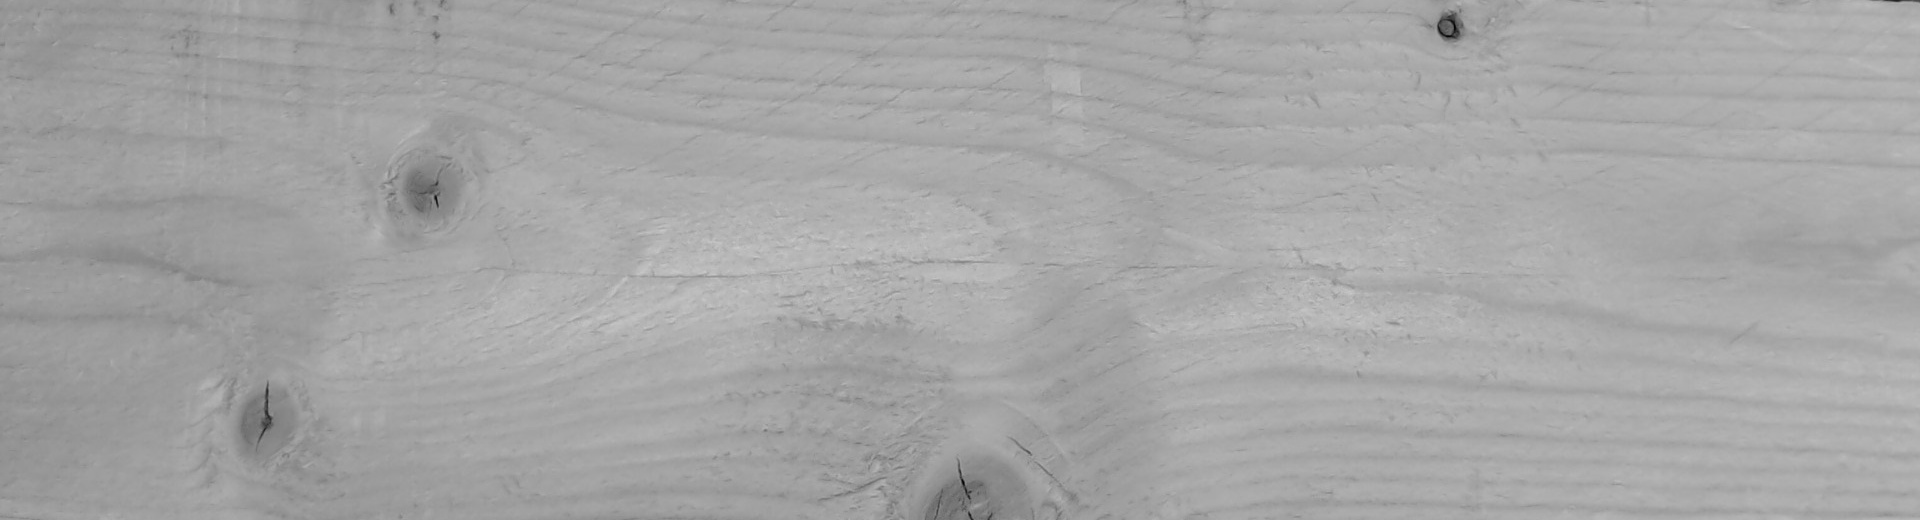

/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links/20190925-181609-657552.jpg



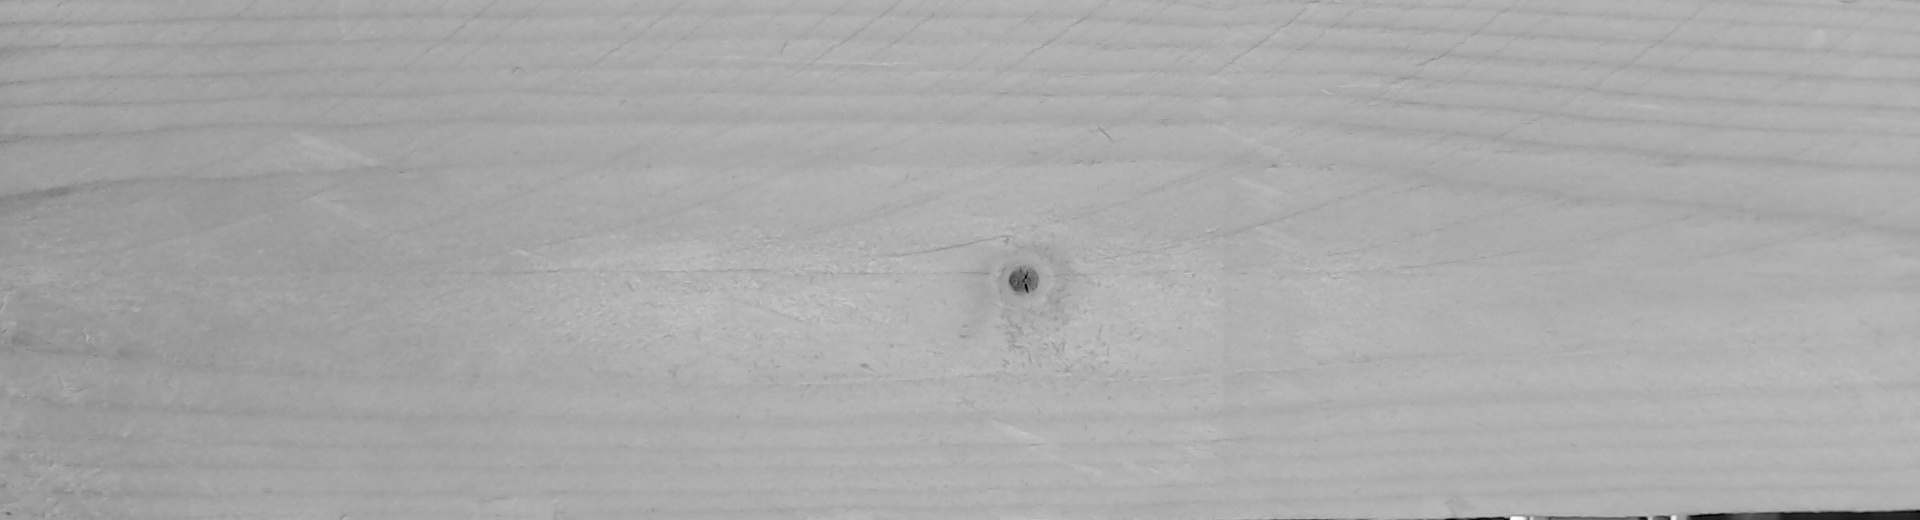

/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links/20190925-175458-776765.jpg



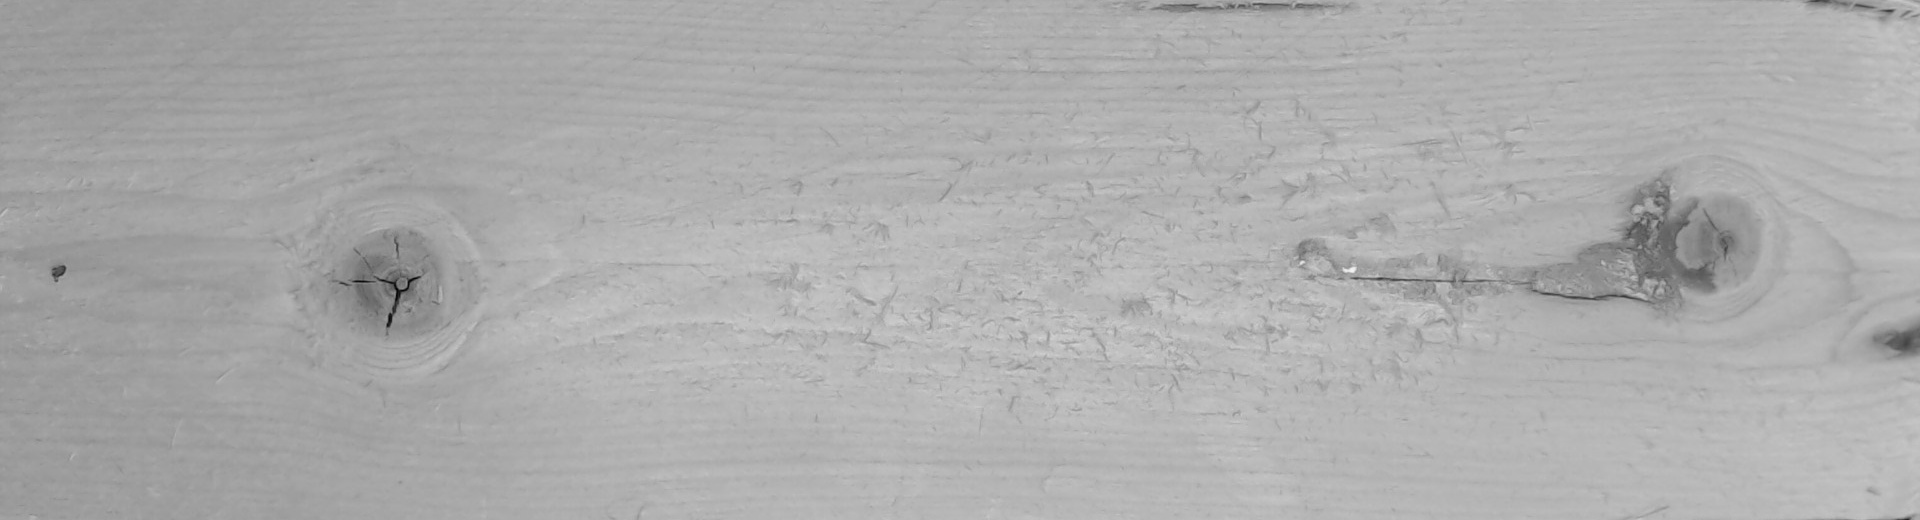

/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links/20190925-180926-653560.jpg



In [7]:
import IPython.display as display
import os
for n in range(3):
  image_path = random.choice(all_image_paths)
  display.display(display.Image(image_path))
  print(image_path)
  print()


# Determine the label for each image
## List the available labels:

In [8]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['links', 'rechts']

Assign an index to each label:

In [9]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'links': 0, 'rechts': 1}

Create a list of every file, and its label index

In [0]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_image_paths]

In [11]:
!pip install google-cloud-automl

     |████████████████████████████████| 235kB 3.5MB/s 


0 score: 0.9425489902496338

1 score: 0.9326480031013489

2 score: 0.6441540122032166

3 score: 0.914804995059967

4 score: 0.6633409857749939

5 score: 0.9469709992408752

6 score: 0.9377819895744324

7 score: 0.9377819895744324



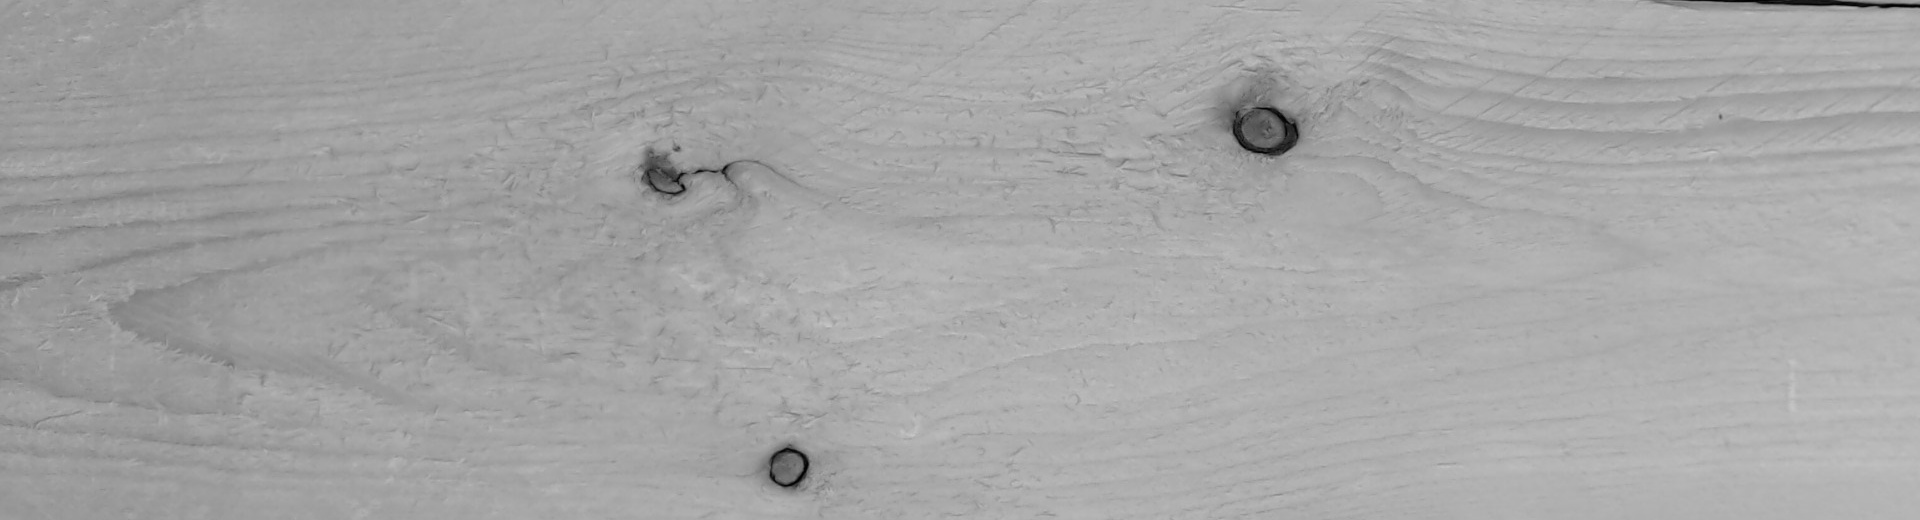

/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links/20190925-175340-788962.jpg
payload {
  classification {
    score: 0.9377819895744324
  }
  display_name: "rechts"
}

8 score: 0.9326480031013489

9 score: 0.9469709992408752

10 score: 0.9548680186271667

11 score: 0.8754330277442932

12 score: 0.9377819895744324

13 score: 0.9377819895744324

14 score: 0.9510700106620789

15 score: 0.8449519872665405

16 score: 0.6820039749145508

17 score: 0.8754330277442932

18 score: 0.9006270170211792

19 score: 0.9425489902496338

20 score: 0.9469709992408752

21 score: 0.5211820006370544



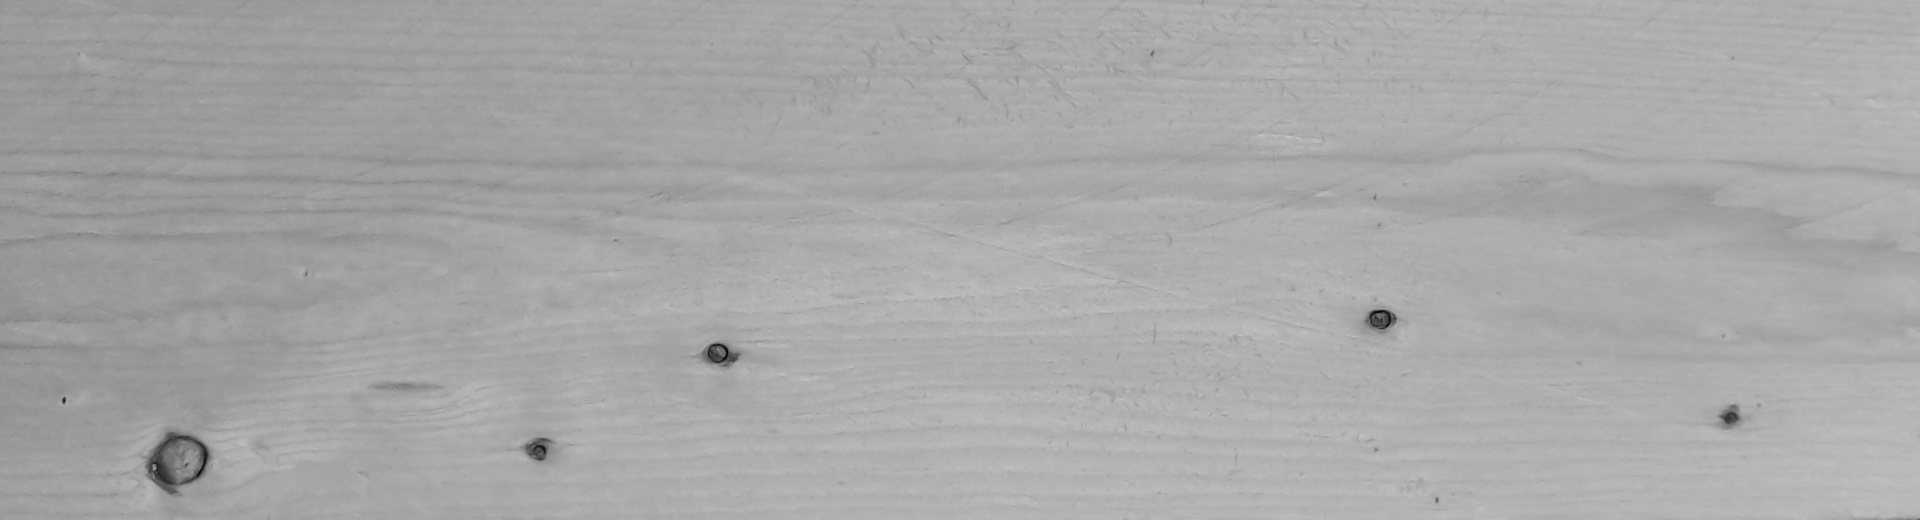

/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links/20190925-175528-858831.jpg
payload {
  classification {
    score: 0.5211820006370544
  }
  display_name: "rechts"
}

22 score: 0.9211840033531189



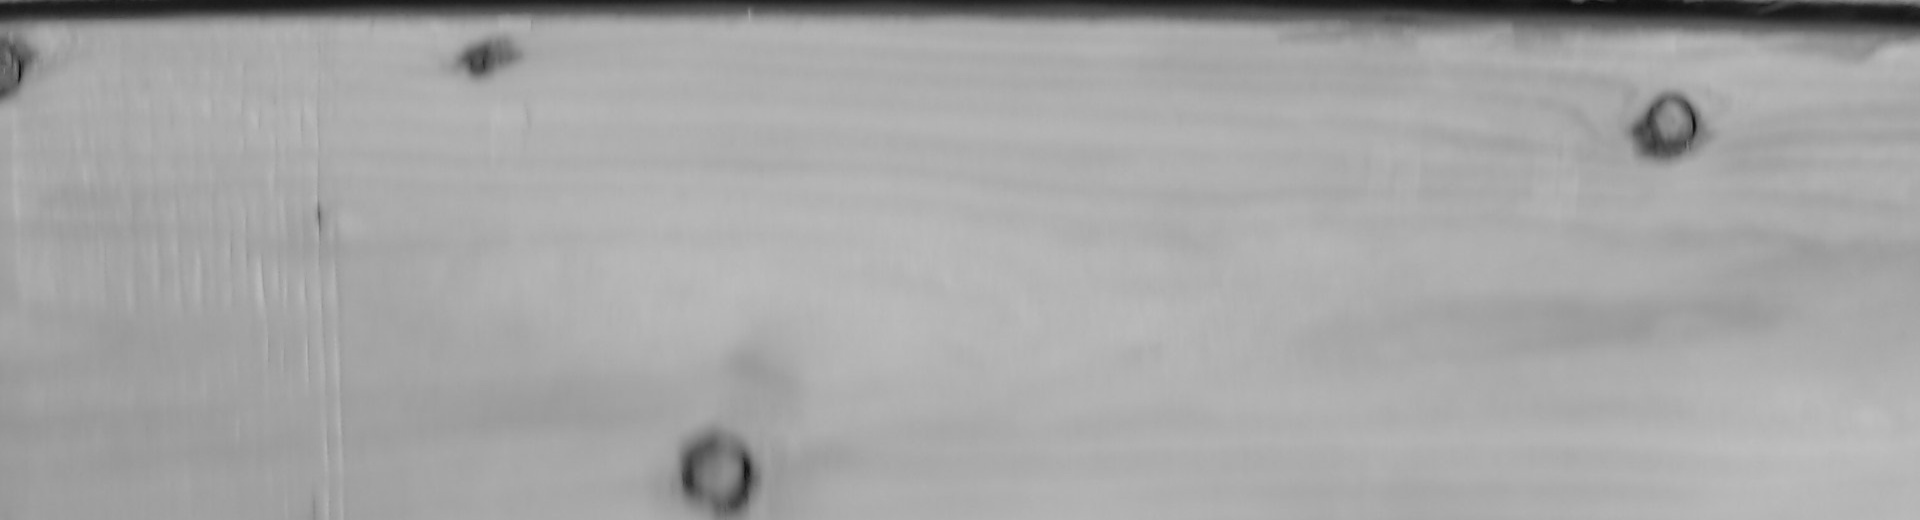

/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links/20190925-175507-666396.jpg
payload {
  classification {
    score: 0.9211840033531189
  }
  display_name: "rechts"
}

23 score: 0.9377819895744324

24 score: 0.9377819895744324

25 score: 0.8557369709014893

26 score: 0.9211840033531189

27 score: 0.9583839774131775

28 score: 0.8754330277442932

29 score: 0.9211840033531189

30 score: 0.9425489902496338

31 score: 0.9377819895744324

32 score: 0.9469709992408752

33 score: 0.9271230101585388

34 score: 0.9510700106620789

35 score: 0.9377819895744324

36 score: 0.9326480031013489

37 score: 0.9469709992408752

38 score: 0.9377819895744324

39 score: 0.9271230101585388

40 score: 0.9211840033531189

41 score: 0.8927779793739319

42 score: 0.9326480031013489

43 score: 0.9326480031013489

44 score: 0.8927779793739319

45 score: 0.8927779793739319

46 score: 0.9326480031013489

47 score: 0.9510700106620789

48 score: 0.9469709992408752

49 score: 0.9377819895744324



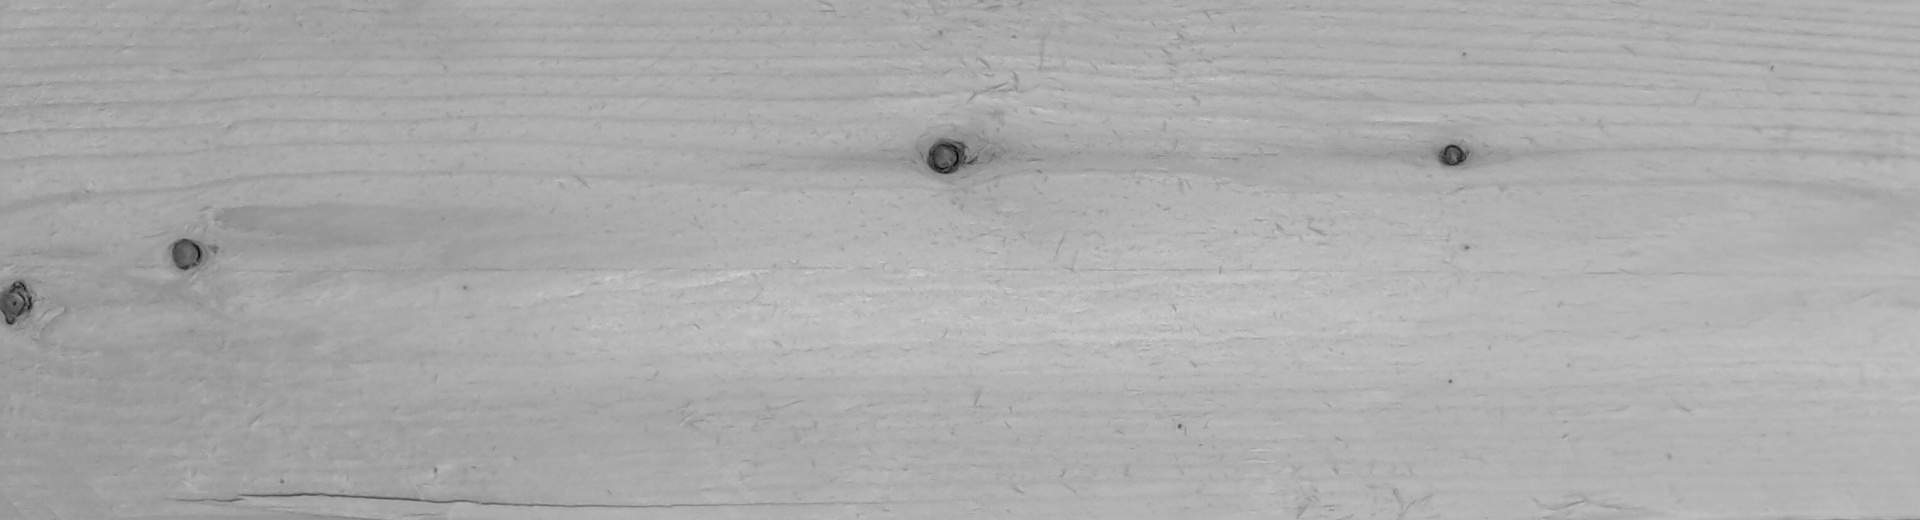

/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links/20190925-181426-109439.jpg
payload {
  classification {
    score: 0.6820039749145508
  }
  display_name: "rechts"
}

56 score: 0.9469709992408752

57 score: 0.9425489902496338

58 score: 0.8927779793739319

59 score: 0.9377819895744324

60 score: 0.961637020111084

61 score: 0.9469709992408752

62 score: 0.9469709992408752

63 score: 0.9510700106620789

64 score: 0.5422869920730591



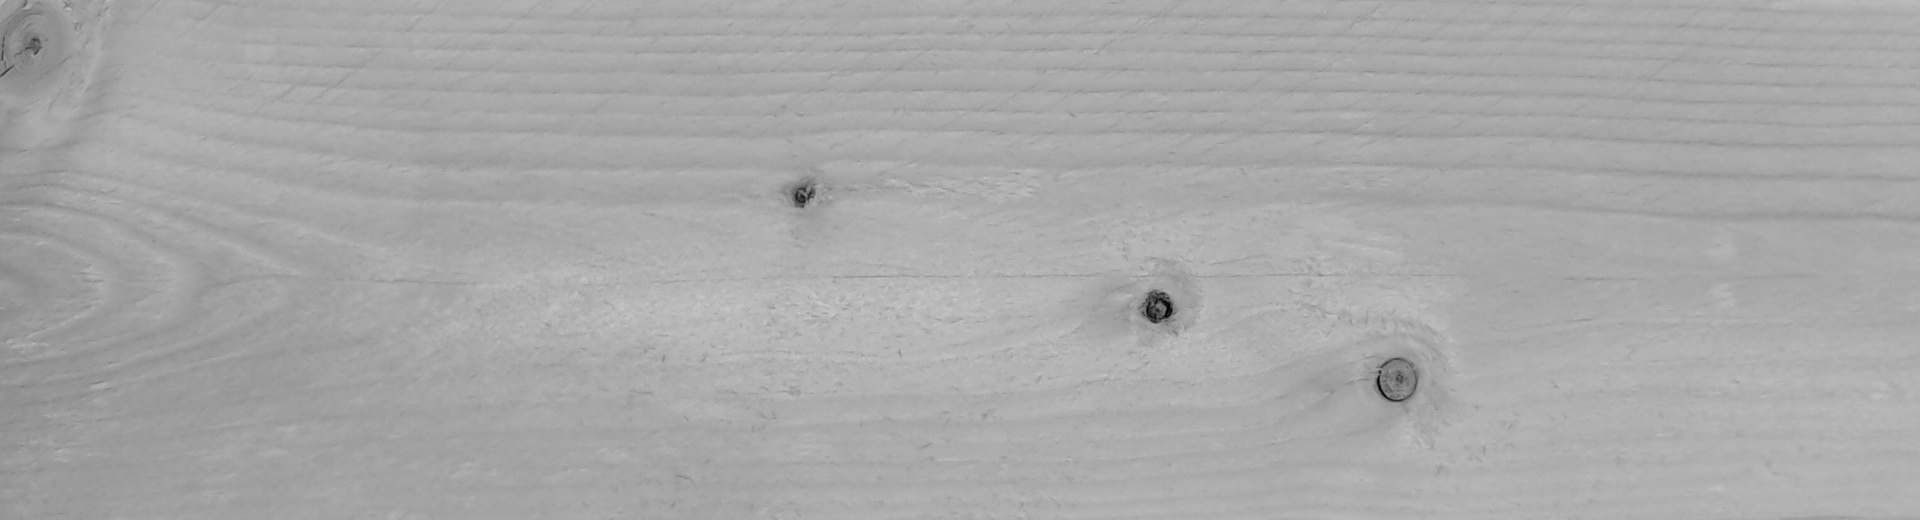

/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links/20190925-181501-093666.jpg
payload {
  classification {
    score: 0.5422869920730591
  }
  display_name: "rechts"
}

65 score: 0.9469709992408752

66 score: 0.9425489902496338

67 score: 0.9271230101585388

68 score: 0.9510700106620789

69 score: 0.9377819895744324

70 score: 0.8086429834365845

71 score: 0.9377819895744324

72 score: 0.9425489902496338

73 score: 0.9469709992408752

74 score: 0.9079610109329224

75 score: 0.9271230101585388

76 score: 0.9583839774131775



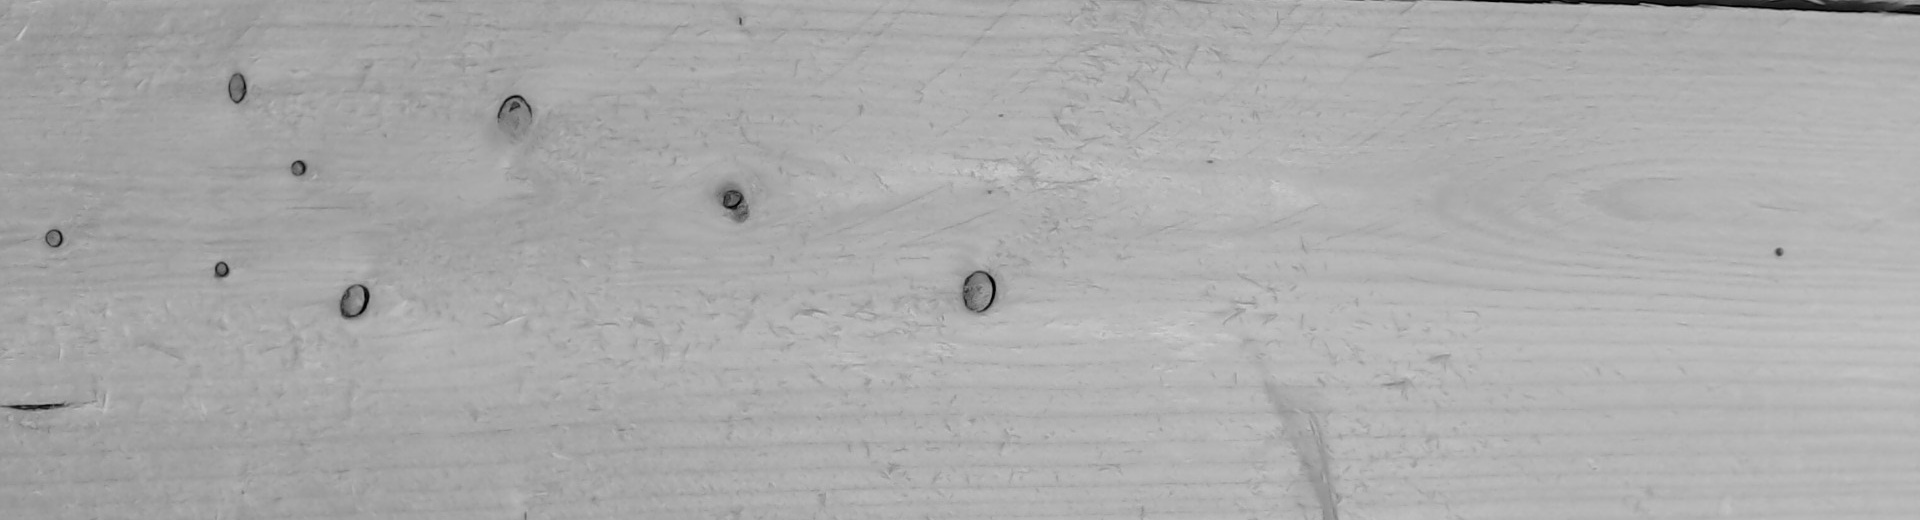

/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/links/20190925-181533-338600.jpg
payload {
  classification {
    score: 0.9583839774131775
  }
  display_name: "rechts"
}

77 score: 0.9469709992408752

78 score: 0.9425489902496338

79 score: 0.9425489902496338

80 score: 0.9425489902496338

81 score: 0.9377819895744324

82 score: 0.6244930028915405

83 score: 0.9079610109329224



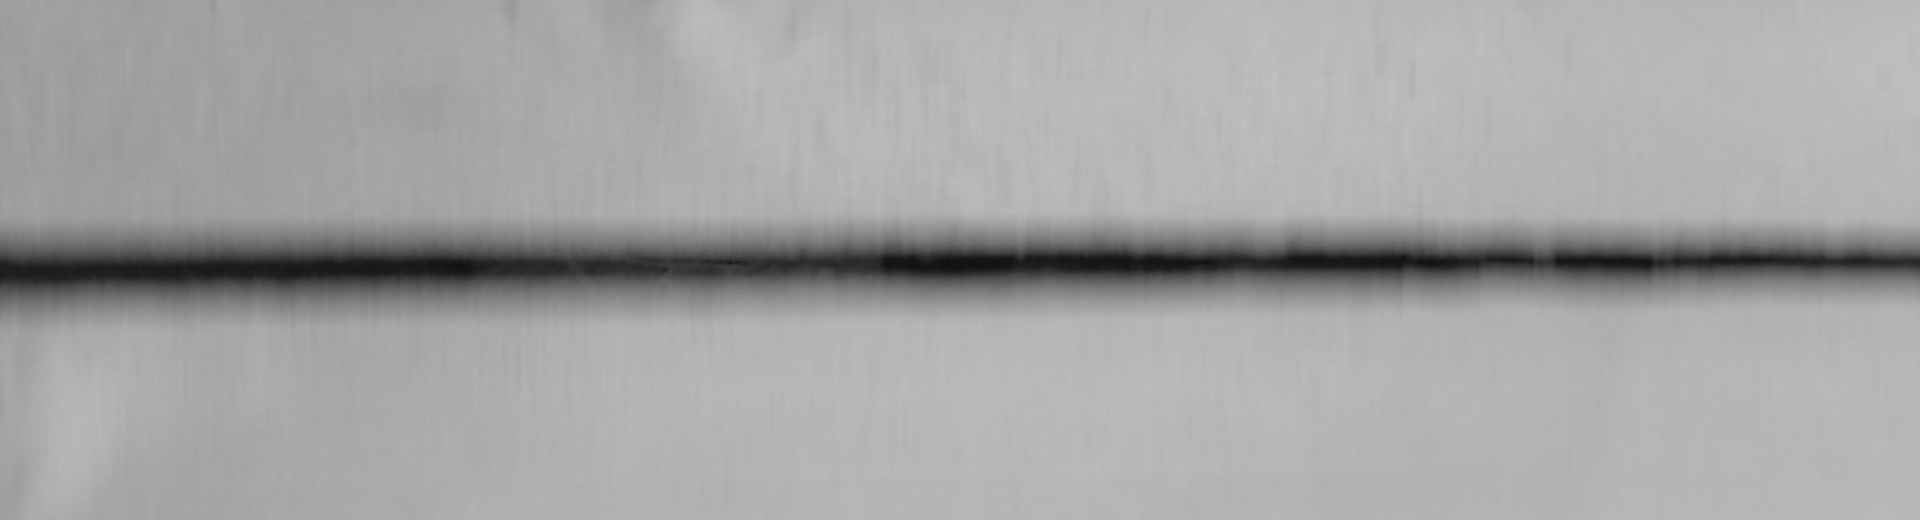

/content/drive/My Drive/Colab Notebooks/Images/BD_2019_09_26_gray/rechts/20190925-175317-970532.jpg
payload {
  classification {
    score: 0.9079610109329224
  }
  display_name: "links"
}

84 score: 0.9425489902496338

85 score: 0.9510700106620789

86 score: 0.9469709992408752

87 score: 0.9425489902496338

88 score: 0.8449519872665405

89 score: 0.9510700106620789

90 score: 0.9469709992408752

91 score: 0.6044129729270935

92 score: 0.9510700106620789

93 score: 0.9469709992408752

94 score: 0.9548680186271667

95 score: 0.9548680186271667

96 score: 0.9425489902496338

97 score: 0.9469709992408752

98 score: 0.9211840033531189

99 score: 0.9510700106620789

100 score: 0.8927779793739319

101 score: 0.9326480031013489

102 score: 0.9510700106620789

103 score: 0.9377819895744324

104 score: 0.9425489902496338

105 score: 0.9583839774131775

106 score: 0.9469709992408752

107 score: 0.8754330277442932

108 score: 0.9377819895744324

109 score: 0.9469709992408752

Test Performance:  0

In [12]:
import sys

from google.cloud import automl_v1beta1
from google.cloud.automl_v1beta1.proto import service_pb2
from google.cloud.automl_v1beta1 import PredictionServiceClient
import json

!export GOOGLE_APPLICATION_CREDENTIALS="/content/drive/My Drive/Colab Notebooks/holzerkennung.json"

def get_prediction(content, project_id, model_id):
  prediction_client = PredictionServiceClient.from_service_account_file(service_account_file)
  
  name = 'projects/{}/locations/us-central1/models/{}'.format(project_id, model_id)
  payload = {'image': {'image_bytes': content }}
  params = {}
  request = prediction_client.predict(name, payload, params)
  return request  # waits till request is returned

def check_prediction(result, true_label):
  pred = result.payload[0].display_name
  return pred == true_label



number_of_items = len(all_image_paths)
counter = 0;

# iterate over all items
for i in range(0, number_of_items - 1):
  with open(all_image_paths[i], 'rb') as ff:
    content = ff.read()
    result = get_prediction(content, project_id,  model_id)
    if str(result)=="":
      print("Error processing file: ", all_image_paths[i])
      continue
    
    is_true = check_prediction(result, label_names[all_image_labels[i]]);
    print(i, result.payload[0].classification)
    if is_true == 0:
      counter = counter + 1
      # show image
      image_path = all_image_paths[i]
      display.display(display.Image(image_path))
      print(image_path)
      print(result)
        
performance = (number_of_items - counter) / number_of_items
print("Test Performance: ", performance)
    

  